In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')

#Define the features (X) and the target (y)
X = df.drop(columns=[
    'music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
    'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
    'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock'
])

y = df[['music_genre_Alternative', 'music_genre_Anime', 'music_genre_Blues',
        'music_genre_Classical', 'music_genre_Country', 'music_genre_Electronic',
        'music_genre_Hip-Hop', 'music_genre_Jazz', 'music_genre_Rap', 'music_genre_Rock']].idxmax(axis=1)

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Like we did in the previous models we are now going to use GridSearch in order to find the best parameter for our model.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Initialize the LabelEncoder to convert labels to numbers
label_encoder = LabelEncoder()

# Encode the labels of y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the base XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
}

# Setup GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train_encoded)

# Show the best parameters found
print("Best parameters found:", grid_search.best_params_)

# Use the best found model to make predictions on the test set
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Decode the predicted and true labels to return to original values
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

# Model evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test_decoded, y_pred_decoded))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Migliori parametri trovati: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
                         precision    recall  f1-score   support

music_genre_Alternative       0.47      0.39      0.43       864
      music_genre_Anime       0.83      0.76      0.79       927
      music_genre_Blues       0.66      0.56      0.61       912
  music_genre_Classical       0.84      0.85      0.85       868
    music_genre_Country       0.61      0.61      0.61       941
 music_genre_Electronic       0.69      0.63      0.66       939
    music_genre_Hip-Hop       0.44      0.43      0.43       887
       music_genre_Jazz       0.54      0.52      0.53       884
        music_genre_Rap       0.43      0.46      0.45       892
       music_genre_Rock       0.51      0.74      0.60       899

               accuracy                           0.60      9013
              macro avg       0.60      0.60      0.60      9013
    

Let's see performance and  the confusion matrix

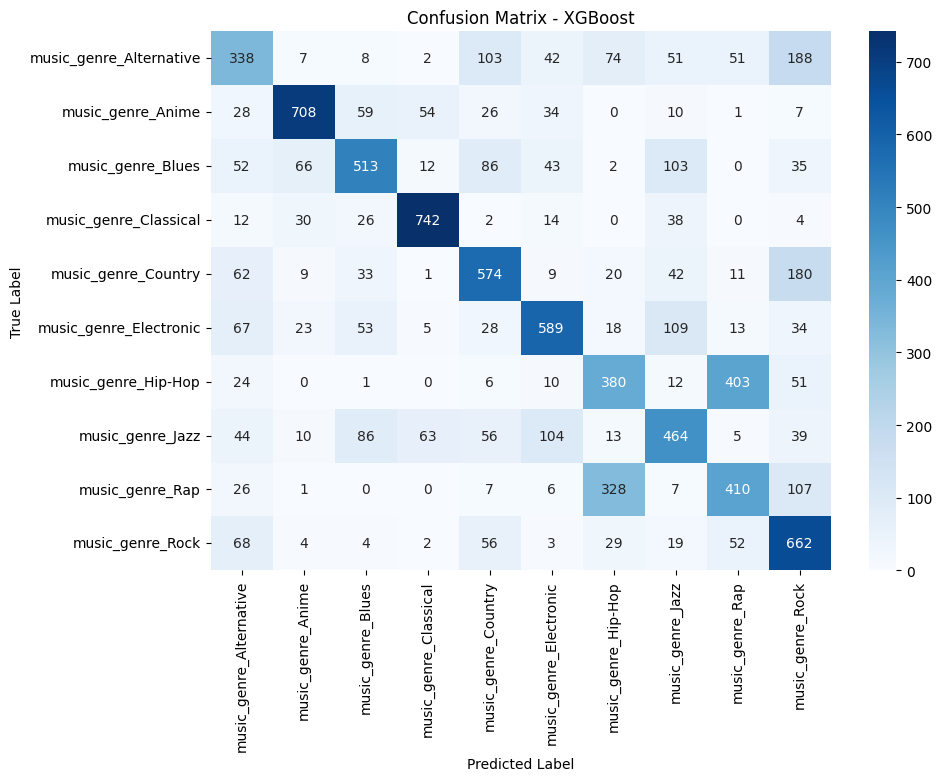

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predictions on the test set using the best model found by GridSearchCV
y_pred_xgb = best_xgb_model.predict(X_test)

# Decode the predictions and test set to return to original format (strings)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

# Create the confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_xgb_decoded)

# Plot the confusion matrix with decoded labels (strings)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_decoded), yticklabels=np.unique(y_test_decoded))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()


The performance of this model compared to the other already seen are way more good in terms of accuracy and recall already from the first test. For this last model too, let's see how much impact the 2 strategies that we have decided to use have in XGBoost

First one, remove the 2 most problematic feature

                        precision    recall  f1-score   support

     music_genre_Anime       0.83      0.78      0.80       948
     music_genre_Blues       0.62      0.55      0.58       875
 music_genre_Classical       0.84      0.86      0.85       903
   music_genre_Country       0.64      0.65      0.64       853
music_genre_Electronic       0.70      0.63      0.66       903
      music_genre_Jazz       0.58      0.57      0.57       908
       music_genre_Rap       0.84      0.83      0.84       917
      music_genre_Rock       0.63      0.80      0.70       902

              accuracy                           0.71      7209
             macro avg       0.71      0.71      0.71      7209
          weighted avg       0.71      0.71      0.71      7209



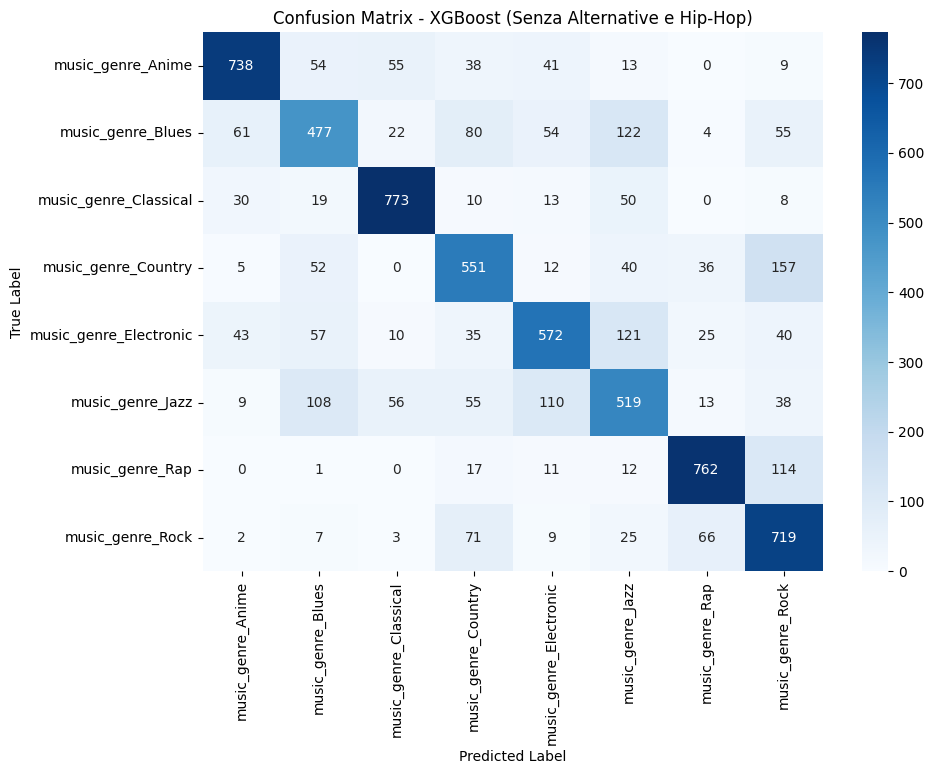

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')

# Exclude rows where 'Alternative' or 'Hip-Hop' are the genre
df = df[(df['music_genre_Alternative'] == 0) & (df['music_genre_Hip-Hop'] == 0)]

# Remove the 'Alternative' and 'Hip-Hop' columns from the dataset
X = df.drop(columns=[
    'music_genre_Alternative', 'music_genre_Rock', 'music_genre_Rap', 'music_genre_Hip-Hop',
    'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical', 'music_genre_Country',
    'music_genre_Electronic', 'music_genre_Jazz'
])

# Define the target (y) excluding 'Alternative' and 'Hip-Hop'
y = df[['music_genre_Rock', 'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical','music_genre_Rap',
        'music_genre_Country', 'music_genre_Electronic', 'music_genre_Jazz']].idxmax(axis=1)

# Initialize the LabelEncoder to convert labels to numbers
label_encoder = LabelEncoder()

# Encode the labels
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create an XGBoost model with standard parameters
xgb_model = xgb.XGBClassifier(
    n_estimators=200,  # Number of trees
    learning_rate=0.1,  # Learning rate
    max_depth=5,  # Maximum depth of trees
    random_state=42  # For reproducibility
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_model.predict(X_test)

# Decode the predicted and true labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Model evaluation
print(classification_report(y_test_decoded, y_pred_decoded))

# Create the confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded)

# Plot the confusion matrix with decoded labels (strings)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_decoded), yticklabels=np.unique(y_test_decoded))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - XGBoost (Without Alternative and Hip-Hop)')
plt.show()


And now, let's check the First way: grouping the Alternative Rap and Hip-Hop genre togheter

                        precision    recall  f1-score   support

         Grouped_Genre       0.76      0.83      0.79      2643
     music_genre_Anime       0.83      0.78      0.80       927
     music_genre_Blues       0.66      0.58      0.62       912
 music_genre_Classical       0.85      0.86      0.86       868
   music_genre_Country       0.65      0.60      0.62       941
music_genre_Electronic       0.71      0.63      0.67       939
      music_genre_Jazz       0.56      0.54      0.55       884
      music_genre_Rock       0.54      0.63      0.58       899

              accuracy                           0.71      9013
             macro avg       0.70      0.68      0.69      9013
          weighted avg       0.71      0.71      0.71      9013



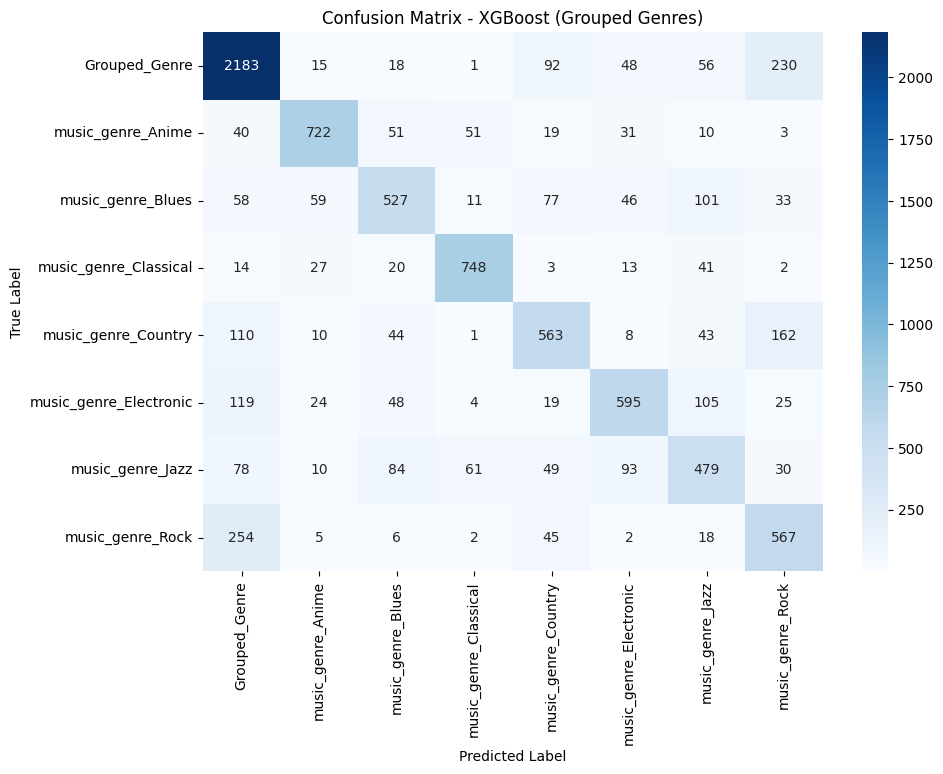

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset into a DataFrame
df = pd.read_csv('dataset_preprocessed.csv')

# Group 'Alternative', 'Rap', and 'Hip-Hop' into a single genre
df['Grouped_Genre'] = df[['music_genre_Alternative', 'music_genre_Rap', 'music_genre_Hip-Hop']].max(axis=1)

# Define features (X) excluding specific genre columns
X = df.drop(columns=[
    'Grouped_Genre', 'music_genre_Alternative', 'music_genre_Rock', 'music_genre_Rap', 'music_genre_Hip-Hop',
    'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical', 'music_genre_Country',
    'music_genre_Electronic', 'music_genre_Jazz'
])

# Define target (y) with the grouped genre
y = df[['Grouped_Genre', 'music_genre_Rock', 'music_genre_Anime', 'music_genre_Blues', 'music_genre_Classical',
        'music_genre_Country', 'music_genre_Electronic', 'music_genre_Jazz']].idxmax(axis=1)

# Initialize the LabelEncoder to convert labels to numbers
label_encoder = LabelEncoder()

# Encode the labels
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create an XGBoost model with standard parameters
xgb_model = xgb.XGBClassifier(
    n_estimators=200,  # Number of trees
    learning_rate=0.1,  # Learning rate
    max_depth=5,  # Maximum depth of trees
    random_state=42  # For reproducibility
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_model.predict(X_test)

# Decode the predicted and true labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Model evaluation
print(classification_report(y_test_decoded, y_pred_decoded))

# Create the confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded)

# Plot the confusion matrix with decoded labels (strings)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test_decoded), yticklabels=np.unique(y_test_decoded))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - XGBoost (Grouped Genres)')
plt.show()


The model obtained with this technique had pretty much the same results compared to the previous run. So in order to have a wider range without excluding Rap and Alternative genres, but actually grouping them in a wider class combined with hip-hop we are going to use this model for the interface.

And now a graphic analysis of the model, using Shap, Feature importance and learning curve

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.9 MB/s eta 0:00:00


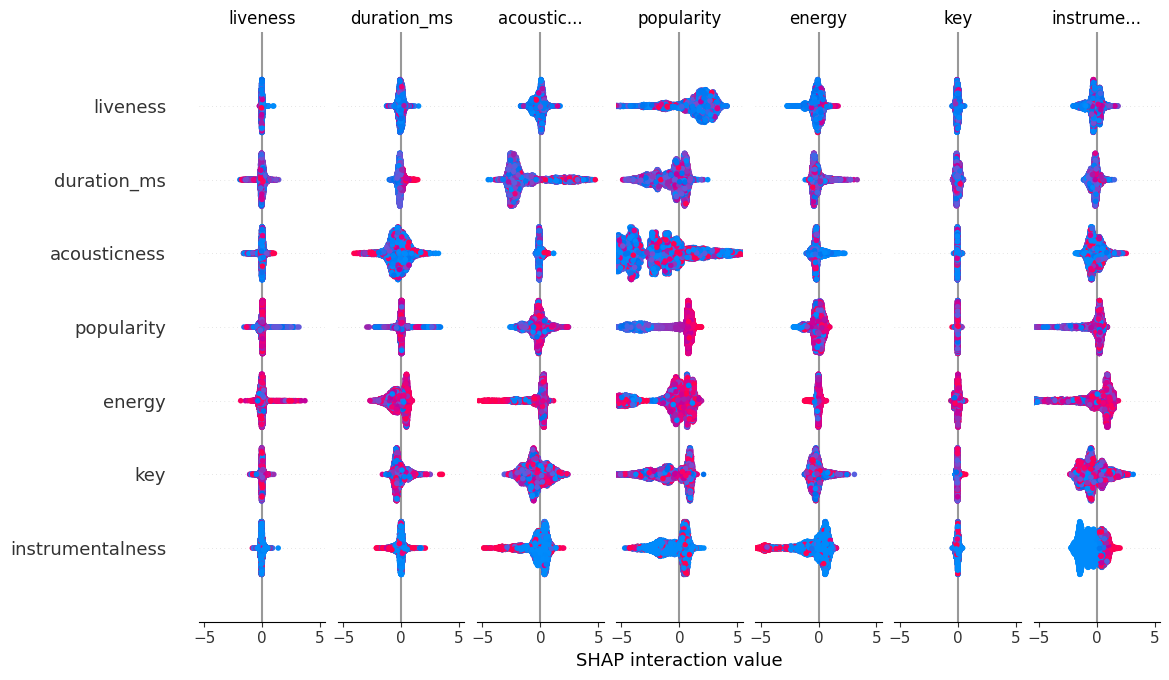

In [6]:
!pip install shap
import shap
# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)


Now the Feature importance:

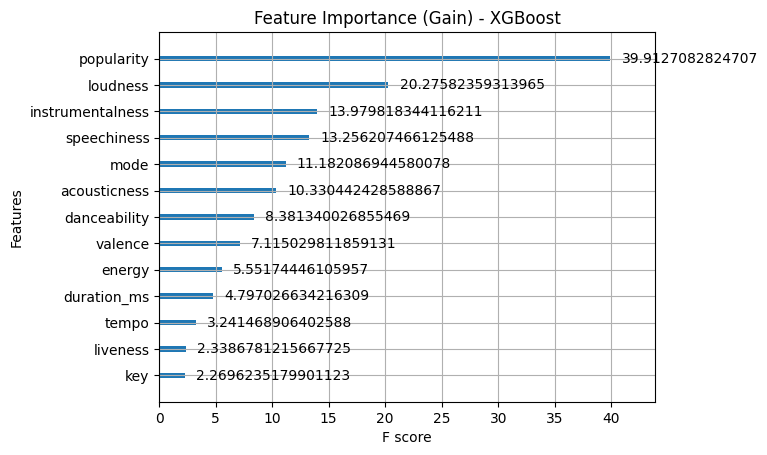

In [7]:
from xgboost import plot_importance

# Plot feature importance based on Gain
plot_importance(xgb_model, importance_type='gain')
plt.title('Feature Importance (Gain) - XGBoost')
plt.show()


Learning Curve:

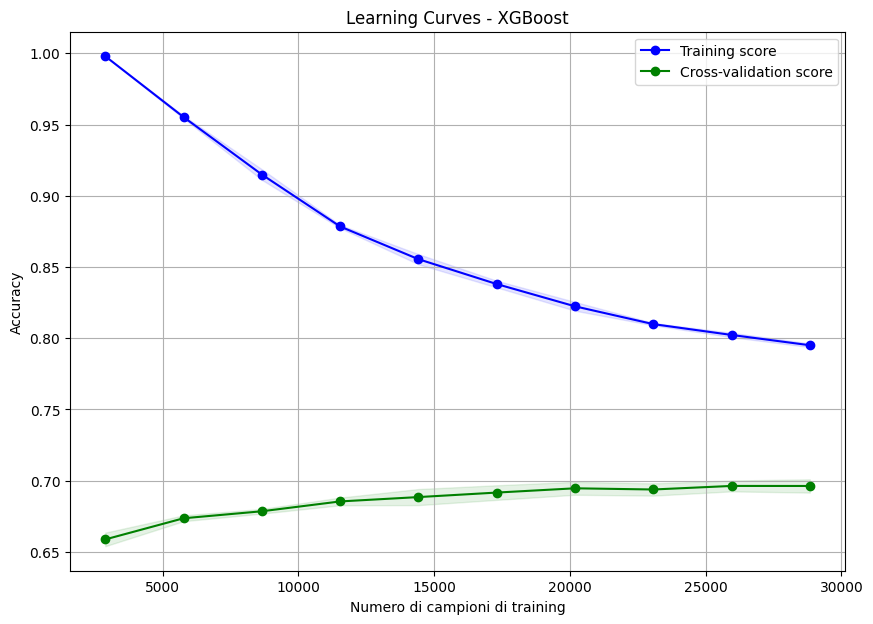

In [8]:
from sklearn.model_selection import learning_curve
import numpy as np

# Calcola le learning curves
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Media e deviazione standard
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot delle learning curves
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')

# Aggiungi le bande di deviazione standard
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.xlabel('Numero di campioni di training')
plt.ylabel('Accuracy')
plt.title('Learning Curves - XGBoost')
plt.legend(loc='best')
plt.grid(True)
plt.show()


Last step of this evaluation of models: extract this last model (the best one)
in order to use it for the interface

In [9]:
from google.colab import files

# Save the model
xgb_model.save_model('xgboost_model.json')

# Download the model
files.download('xgboost_model.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>